In [1]:
import sys
import os
sys.path.append('..')

In [2]:
from mypackage.catheter_utils import *

In [3]:
# Sympy libraries to symbolically create system models
from sympy import symbols
from sympy.physics import mechanics
from sympy.physics.mechanics import dynamicsymbols
import sympy.physics.mechanics as me
from sympy.physics.mechanics import inertia
from sympy import Dummy, lambdify
from sympy import Matrix

# Scipy libraries to optimize and integrate
from scipy import integrate
from scipy.integrate import odeint
from scipy.optimize import minimize

# Numpy library to perform computational heavy lifting
import numpy as np

# Crawlab plotting toolbox to generate nice plots
# import crawlab_toolbox.plotting as plot

from matplotlib.animation import writers
from matplotlib import animation, rc
from matplotlib import pyplot as plt
import matplotlib as mpl

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import HTML

In [4]:
# Number of elements
n = 5

# Total mass 
M = 0.1 # kg

# Total length
L = 80e-3 # m

# Young's Modulus
E = 10e-3 * 1e-6

# Moment of inertia
I = 1

p = [M, L, E, I]

In [5]:
kane = derive_sys(n,p)
funcs = parameterize(n,kane)

KM, fr, fr_star, q, u, Torque, F_in, lengths, masses = kane

In [29]:
# Initial positions and velocities
theta0_z = 90.
theta0dot_z = 0.

X0 = np.array([theta0_z,theta0dot_z])
# Maximum allowable actuator effort
force_max = 1

# Time information
dt = 0.01
tmax = 10.
time = np.arange(0,tmax,dt)

# Desired y-coordinate of the tip
y_desired = L/2

# Control parameters
kp = 10.
kd = 5.
use_control = False

args = [force_max, time, X0, y_desired, lengths]
control_args = [kp,kd,use_control]

In [25]:
A,B = linearize_system(n,kane)

In [30]:
lin_response = linear_response(n,A,B,args,control_args)
# nonlin_response = nonlinear_response(n,args,funcs,control_args)

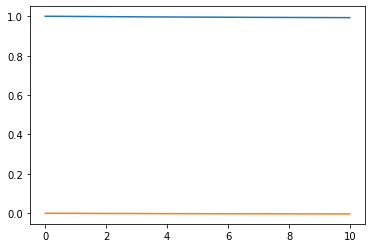

In [31]:
plt.plot(time,nonlin_response[:,n-1])
plt.plot(time,nonlin_response[:,n-2])

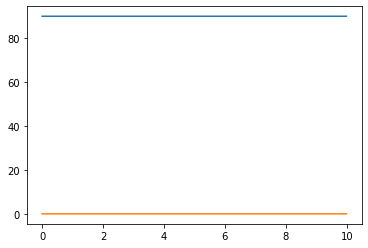

In [32]:
plt.plot(time,lin_response[:,n-1])
plt.plot(time,lin_response[:,n-2])